In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
xtrain=pd.read_csv('x_train.csv')
ytrain=pd.read_csv('y_train.csv',header=None)
xtest=pd.read_csv('x_test.csv')
ytest=pd.read_csv('y_test.csv',header=None)

probability_of_classes={}
a=ytrain.pivot_table(columns=[0], aggfunc='size')

for i in ['CYT','ERL','EXC','ME1','ME2','ME3','MIT','NUC','POX','VAC']:
    pi=a[i]/1000
    probability_of_classes.update({i:pi})
    

probability_of_classes
    

{'CYT': 0.313,
 'ERL': 0.005,
 'EXC': 0.023,
 'ME1': 0.03,
 'ME2': 0.038,
 'ME3': 0.106,
 'MIT': 0.159,
 'NUC': 0.292,
 'POX': 0.015,
 'VAC': 0.019}

In [3]:
#a(i)
classification_errors_train=[]
classification_errors_test=[]
for i in range(10):
    ytrain_pred=np.random.choice(['CYT','ERL','EXC','ME1','ME2','ME3','MIT','NUC','POX','VAC'],1000, p=list(probability_of_classes.values()))
    classification_errors_train.append(1-accuracy_score(ytrain,ytrain_pred))
    
    
    ytest_pred=np.random.choice(['CYT','ERL','EXC','ME1','ME2','ME3','MIT','NUC','POX','VAC'],484, p=list(probability_of_classes.values()))
    classification_errors_test.append(1-accuracy_score(ytest,ytest_pred))
    
print('mean classification error on training data',np.array(classification_errors_train).mean())
print('standard deviation of classification error on training data',np.array(classification_errors_train).std())

print('----------')

print('mean classification error on test data',np.array(classification_errors_test).mean())
print('standard deviation of classification error on test data',np.array(classification_errors_test).std())

mean classification error on training data 0.766
standard deviation of classification error on training data 0.010109401564880098
----------
mean classification error on test data 0.775
standard deviation of classification error on test data 0.016540543437706987


In [4]:
#a(ii)
ytrain_pred=['CYT']*1000
print('classification error on training data',1-accuracy_score(ytrain,ytrain_pred))

ytest_pred=['CYT']*484
print('classification error on test data',1-accuracy_score(ytest,ytest_pred))

classification error on training data 0.687
classification error on test data 0.6900826446280992


In [5]:
#(b)


def find_vectors_and_plots(B,bagg_size,max_depthh,max_featuress):
    train_mean_error_rate=[]
    train_std_error_rate=[]
    test_mean_error_rate=[]
    test_std_error_rate=[]


    for i in range(B):
        training_error_rate=[]
        test_error_rate=[]
    
        for j in range(10):
            xtrain_bagged,xtest_bagged,ytrain_bagged,ytest_bagged=train_test_split(xtrain,ytrain,
            train_size=bagg_size)
            model=RandomForestClassifier(n_estimators=i+1,criterion='entropy',
            max_depth=max_depthh,bootstrap=True,max_features=max_featuress)
            
            model.fit(xtrain_bagged,ytrain_bagged.values.ravel())
            ytrain_pred=model.predict(xtrain)
            ytest_pred=model.predict(xtest)
        
        
            training_error_rate.append(1-accuracy_score(ytrain,ytrain_pred))
            test_error_rate.append(1-accuracy_score(ytest,ytest_pred))
        
        
        
        train_mean_error_rate.append(np.array(training_error_rate).mean())
        train_std_error_rate.append(np.array(training_error_rate).std())
        test_mean_error_rate.append(np.array(test_error_rate).mean())
        test_std_error_rate.append(np.array(test_error_rate).std())
    
    
    x=np.arange(1,B+1)
    plt.plot(x,train_mean_error_rate,label='training data')
    plt.plot(x,test_mean_error_rate,label='test data')
    plt.ylabel('mean error rate')
    plt.xlabel('number of trees')
    plt.legend()
    plt.show()


    plt.plot(x,train_std_error_rate,label='training data')
    plt.plot(x,test_std_error_rate,label='test data')
    plt.ylabel('standard deviation of error rate')
    plt.xlabel('number of trees')
    plt.legend()
    plt.show()
    print('the lowest test error is when B=',np.argmin(test_mean_error_rate)+1,'with test error of:',np.array(test_mean_error_rate).min(),'with standar deviation of',test_std_error_rate[np.argmin(test_mean_error_rate)])

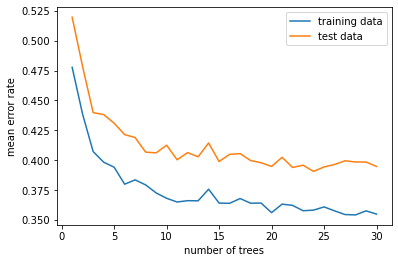

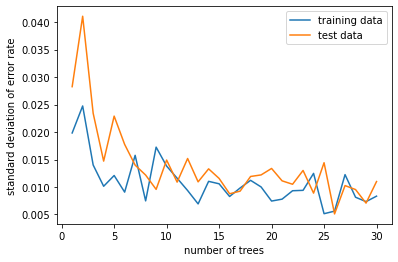

the lowest test error is when B= 24 with test error of: 0.39070247933884295 with standar deviation of 0.008884297520661154


In [6]:
find_vectors_and_plots(30,1/2,5,3)

In [ ]:
find_vectors_and_plots(100,1/2,5,3)

In [ ]:
find_vectors_and_plots(100,1/3,5,3)
find_vectors_and_plots(100,1/2,5,3)
find_vectors_and_plots(100,2/3,5,3)

In [ ]:
find_vectors_and_plots(100,1/2,1,3)
find_vectors_and_plots(100,1/2,5,3)
find_vectors_and_plots(100,1/2,None,3)

In [ ]:
find_vectors_and_plots(100,1/2,5,1)
find_vectors_and_plots(100,1/2,5,3)
find_vectors_and_plots(100,1/2,5,8)